*** Marketing Department ***

*   Understand how to leverage the power of data science to perform market segmentation and transform marketing department.
*   Perform exploratory data analysis and visualize customers dataset using distplot, histograms and KDE
*   Learn how to fill out missing data points (null elements)
*   Understand the theory and intuition behind K means clustering algorithms
*   Learn how to find the optimal number of clusters using the elbow method
*   Apply K means algorithms in scikit learn to perform market segmentation
*   Understand the theory and intuition behind autoencoders
*   Learn auto encoders to perform dimentionality reduction
*   Build and train auto encoder models in keras
*   Understand the intuition behind principal components analysis (PCA)
*   Apply PCA to perform dimentionality reduction using real world dataset.





*** Understand the problem statement and business case ***

In this case, we have been hired as a consultant to a bank in New york city.

The bank has extensive data on their customers for the past 6 months

The marketing team at the bank wants to launch a targeted ad marketing campaign by driving their customers into at least 3 distintive groups.

*** Let's look at the Data ***

1.   custid: Identification of credit card holder
2.   Balance: Balance amount left in customers account to make purchases
3.   balance_frequency: How frequently the balance is updated, score between 0 and 1(1=frequently updated, 0= not frequently updated)
4.   Purchases: Amount of purchases made from account
5.   One of purchases: Maximum purchase amount done in one go
6.   Installments_purchases: Amount of purchases done in installment.
7.   Cash_Advance: Cash in advance given by user.
8.   Purchases_frequency: How frequently the purchases are being made, score between 0 and 1(1= frequently the purchases are being made, 0= not frequently purchased)
9.   one_off_purchases_frequency: how frequently purchases are happening in one go
10.   Purchases_installment_frequentcy: how frequently purchases in installment are being done
11.   cash_advance_frequency: how frequently the cash in advance being paid.
12.   cash_advance_TRX: number of transections made with cash in advance
13.   purchases_TRX: Number of purchase transection made.
14.   credit limit: Limit of credit card for user 
15.   payments: amount of payment done by user.
16.   prc_full_payment: percent fo full payment paid by user
17.   Tenure: Tenure of credit card service for user





In [1]:
# import libraries and data set.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Data Science/Marketing Department

/content/drive/My Drive/Data Science/Marketing Department


In [4]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
# mean balance
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# describe
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
## lets see who made one off purchases of 40761$
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


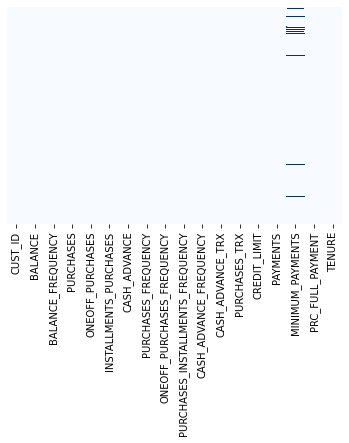

In [9]:
# visualize data

#missing data or not

sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# fillout null values
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# lets check any duplicate values here

creditcard_df.duplicated().sum()

0

In [14]:
# drop customer id column as its not important for us
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [15]:
n = len(creditcard_df.columns)
n

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

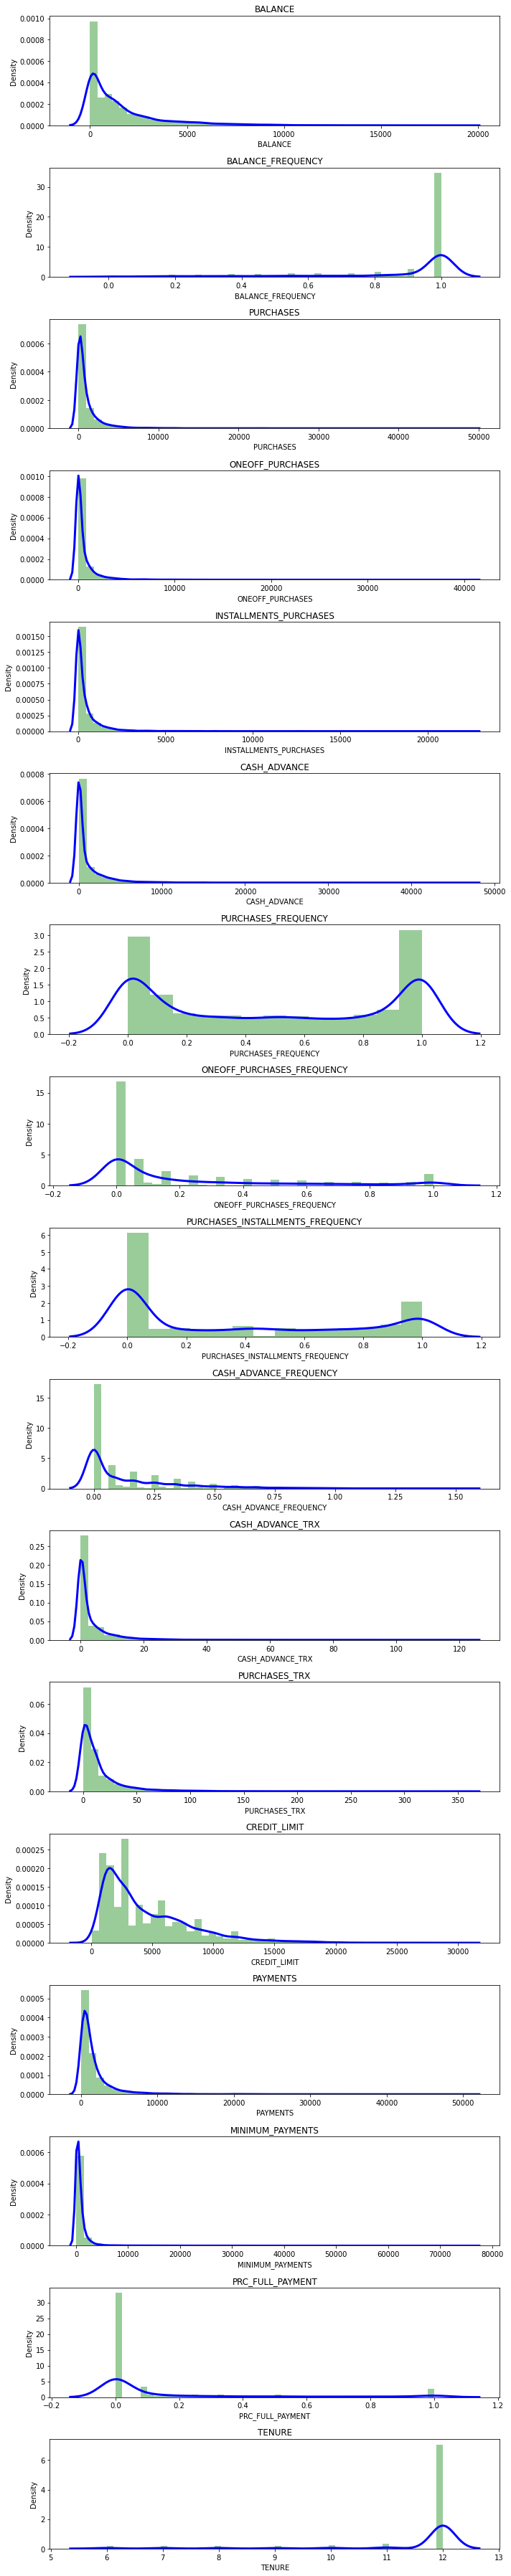

In [16]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE plot represents the kernel density estimate
# KDE is used for visualizing the probability density of a continuous variable.
# KDE demonstrate the probability density at different values in a continuous variable.

plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [17]:
# sns.pairplot(creditcard_df)
# correlation between purchase and oneoff purchases and installment purchases
# Trend beetween purchases and credit limit and payments

correlations = creditcard_df.corr()

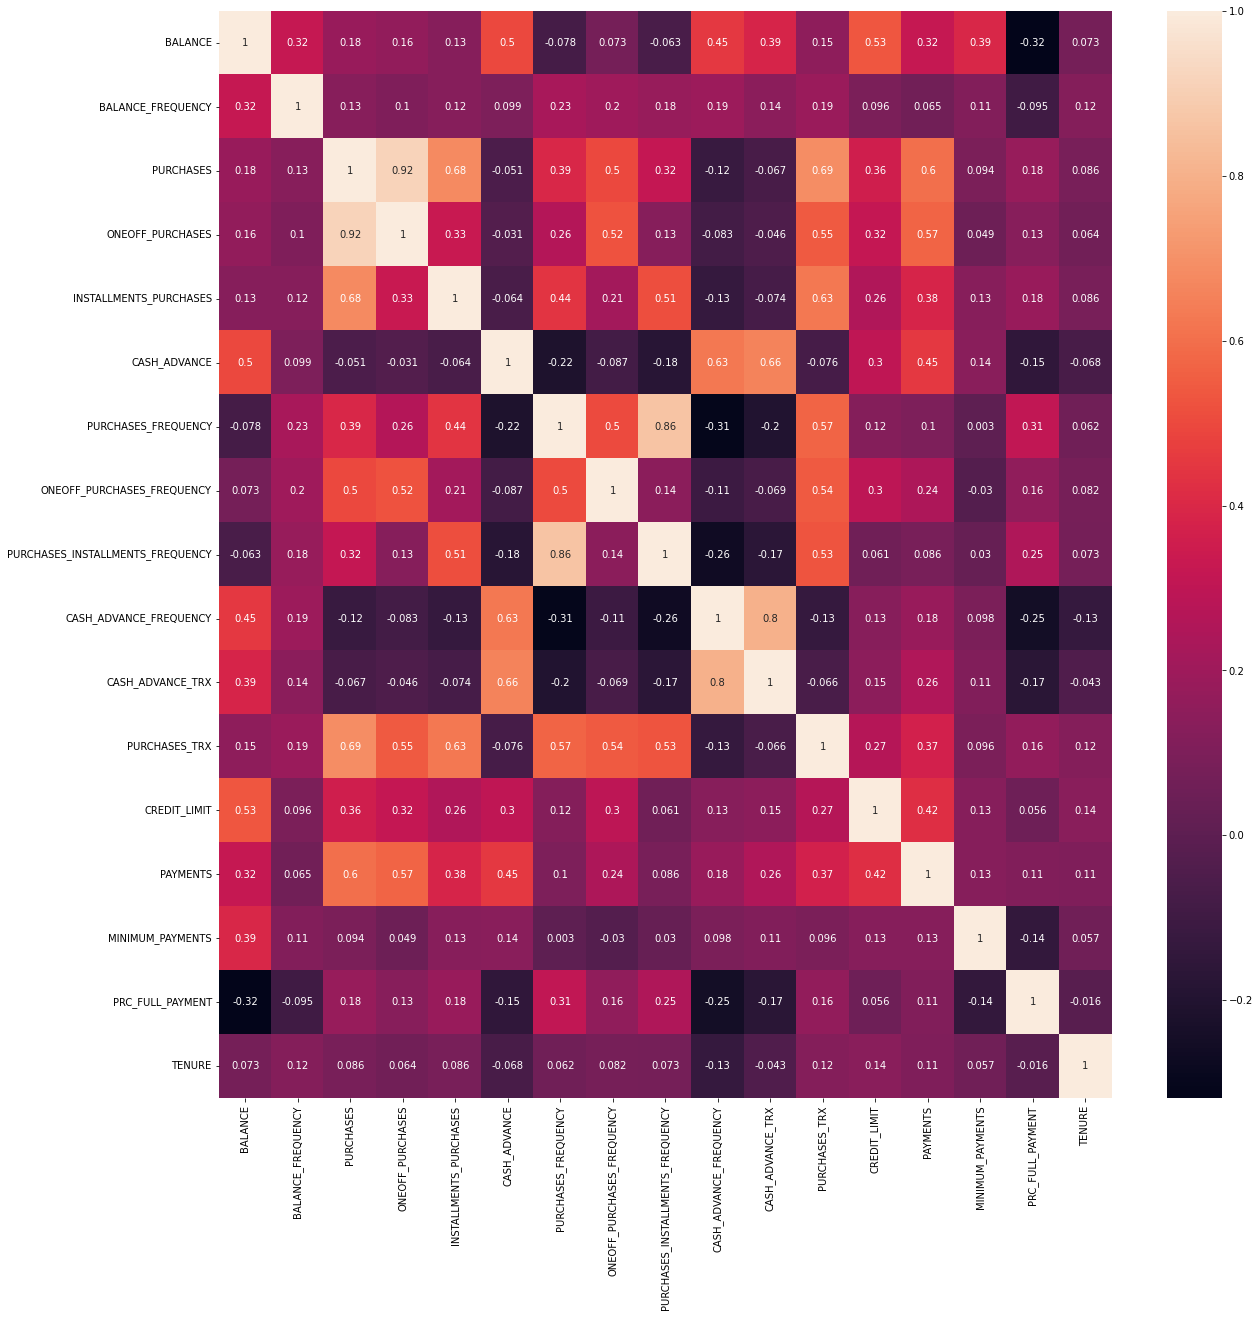

In [18]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

*** K-Means Intuition ***

*   K-means is an unsupervised learning algorithm (Clustering)
*   k-Means works by grouping some data points together (clustering) in an unsupervised fashion
*   the algorithm groups observations with similar attribute values together by measuring the euclidian distance between points.





*** K-Means algorithm steps ***

1. Choose number of clusters 'k'
2. select random k points that are going to be the centroids for each cluster
3. assign each data points to the nearest centroid, doing so well enable us to create 'k' number of clusters
4. calculate a new centroid for each cluster
5. Reassign each data point to the new closest centroid
6. go to step 4 and repeat.

*** How to select the optimal number of cluster(k) "Elbow Method" ***

within cluster sum of square ( WCSS)
= sum_{pi in cluster 1} distance(pi,c1)^{2} +....

In [19]:
# Let's scale the data first

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled.shape

(8950, 17)

In [20]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [21]:
score_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

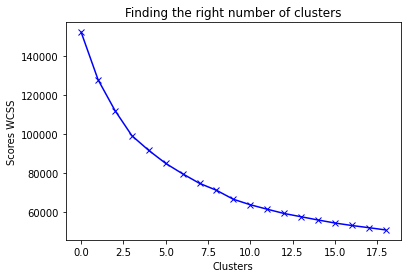

In [22]:
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

# from this we can observe that, 4th cluster seems to be forming the elbow of the curve
# however, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7 or 8

In [23]:
# Apply K_Means Method

kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [24]:
labels

array([3, 4, 2, ..., 0, 0, 0], dtype=int32)

In [25]:
kmeans.cluster_centers_.shape

(8, 17)

In [26]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [27]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
1,-0.360868,0.331542,-0.030868,-0.239609,0.367022,-0.361693,0.990478,-0.378256,1.199799,-0.471508,-0.359289,0.191733,-0.261410,-0.213291,-0.051287,0.310377,0.255720
2,-0.116806,0.402699,0.580381,0.704348,0.078094,-0.331809,0.999026,1.915801,0.212951,-0.417504,-0.332921,0.666389,0.470492,0.172787,-0.154844,0.462860,0.274996
3,0.012544,0.404342,-0.355490,-0.239466,-0.400499,-0.096198,-0.846580,-0.384538,-0.755389,0.100717,-0.030056,-0.479139,-0.302446,-0.250190,-0.007589,-0.455187,0.273213
4,1.681673,0.392153,-0.219524,-0.156195,-0.232170,2.015728,-0.477451,-0.210189,-0.419008,1.921204,1.929140,-0.269113,1.023446,0.819606,0.511294,-0.390944,0.069513
5,-0.701092,-2.138460,-0.309767,-0.234182,-0.302091,-0.322644,-0.553598,-0.440043,-0.439844,-0.521764,-0.376480,-0.418560,-0.176244,-0.202002,-0.257020,0.283165,0.201504
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,1.110263,0.475718,2.571220,1.837775,2.703405,-0.125136,1.170408,1.551592,1.294742,-0.265418,-0.124742,3.223166,1.330785,1.513267,0.809454,0.237560,0.335543


In [28]:
# in order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, cluster with 
# Second Customers cluster (Revolvers): who use credit card as a loan ( most lucrative sector): highest balance ($5000) and cash advance (~$5000), low
# Third Customers cluster (VIP/Prime): high credit limit $16k and highest percentage of full payment, target for increase credit limit and increase 
# Fourth customers cluster (low tenure): these are customers with low tenure (7days), low balance

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
1,813.359092,0.955810,937.255929,194.734692,742.961493,220.383319,0.887877,0.089617,0.841268,0.040791,0.796944,19.475604,3543.331790,1115.687129,744.683322,0.244495,11.859537
2,1321.352773,0.972666,2243.197671,1761.510827,481.686844,283.051362,0.891308,0.773978,0.449070,0.051597,0.976889,31.273778,6206.290909,2233.344904,503.349031,0.289093,11.885333
3,1590.583725,0.973056,243.695791,194.972897,48.901680,777.140100,0.150577,0.087742,0.064226,0.155299,3.043714,2.800217,3394.026975,1008.867609,846.521458,0.020580,11.882948
4,5064.735041,0.970168,534.188310,333.186299,201.118874,5205.946236,0.298726,0.139754,0.197913,0.519597,16.413793,8.020690,8218.166144,4105.823620,2055.756280,0.039370,11.610345
5,105.211929,0.370689,341.382646,203.742891,137.890642,302.271277,0.268165,0.071184,0.189632,0.030734,0.679628,4.306002,3853.203250,1148.368309,265.232576,0.236535,11.786982
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,3875.394281,0.989964,6496.656972,3642.768196,2855.723639,716.455532,0.960092,0.665328,0.879001,0.082031,2.397554,94.825688,9336.391437,6113.904331,2750.604313,0.223197,11.966361


In [29]:
labels.shape

(8950,)

In [30]:
labels.max()

7

In [31]:
labels.min()

0

In [32]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


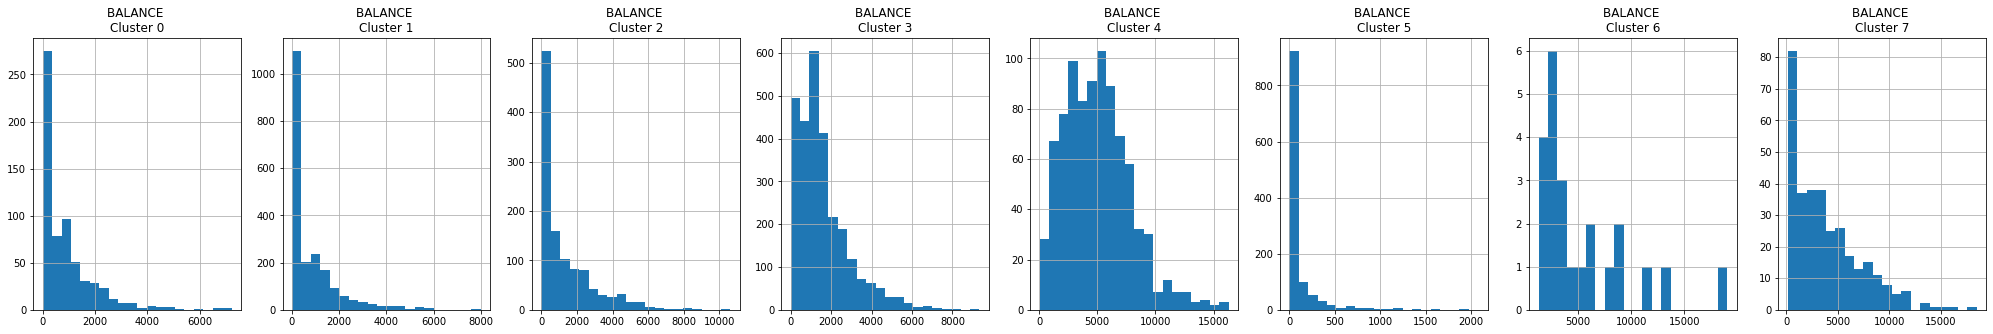

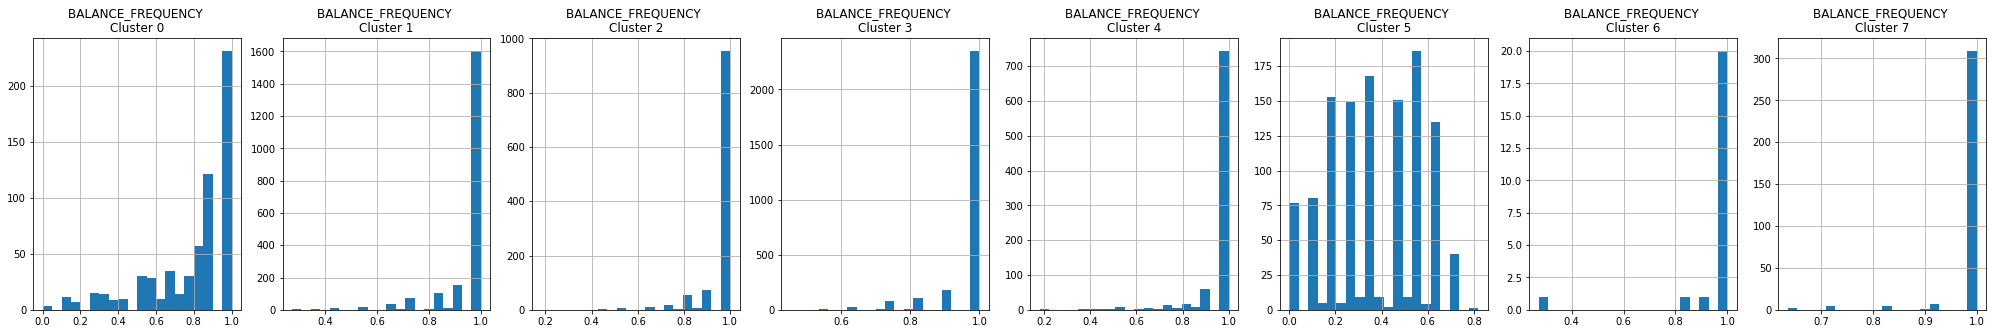

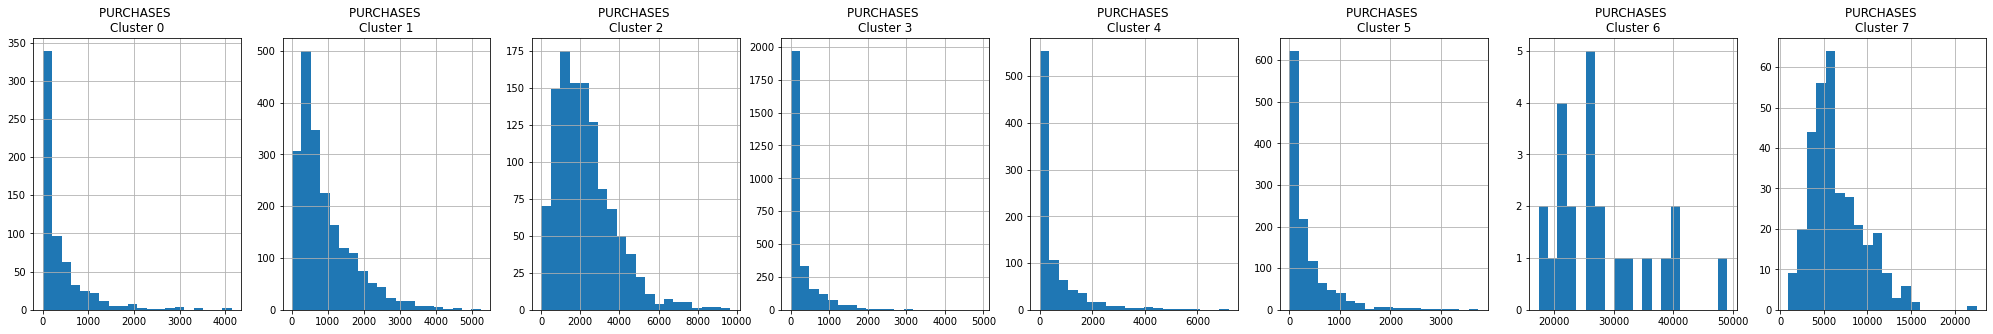

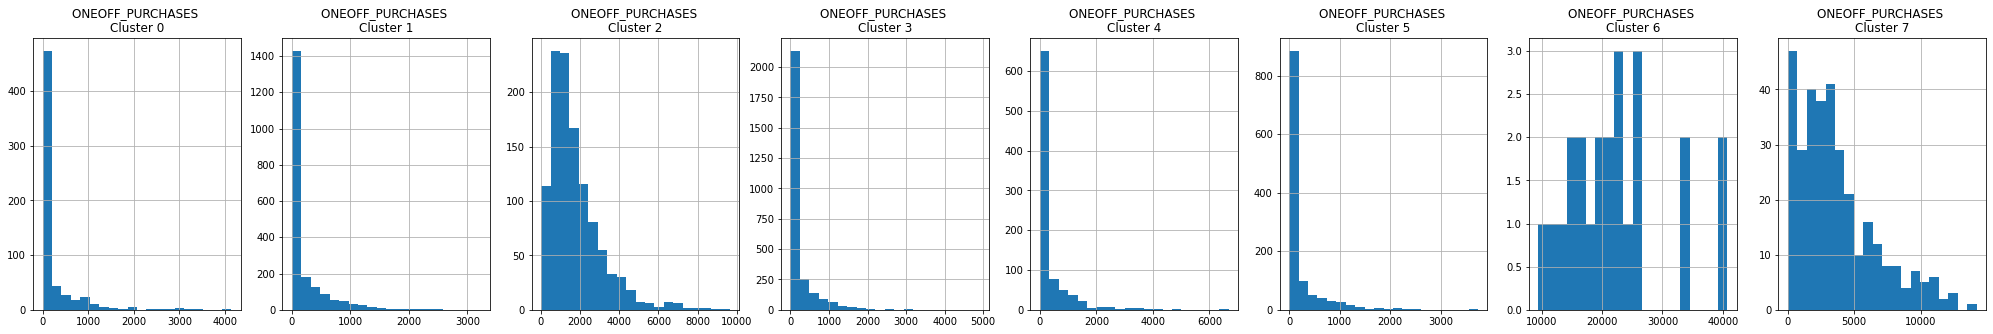

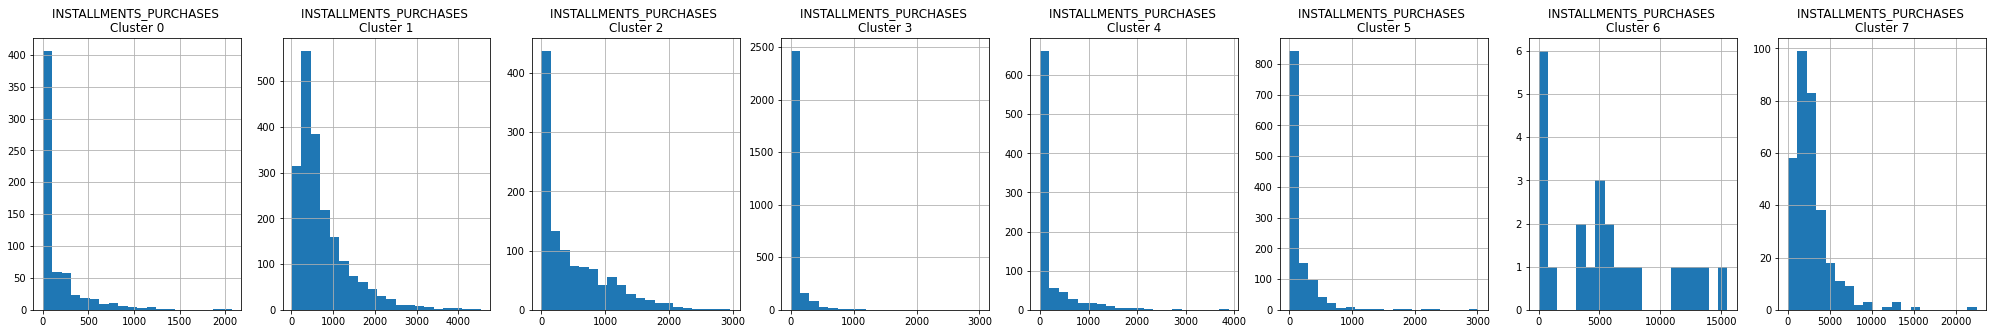

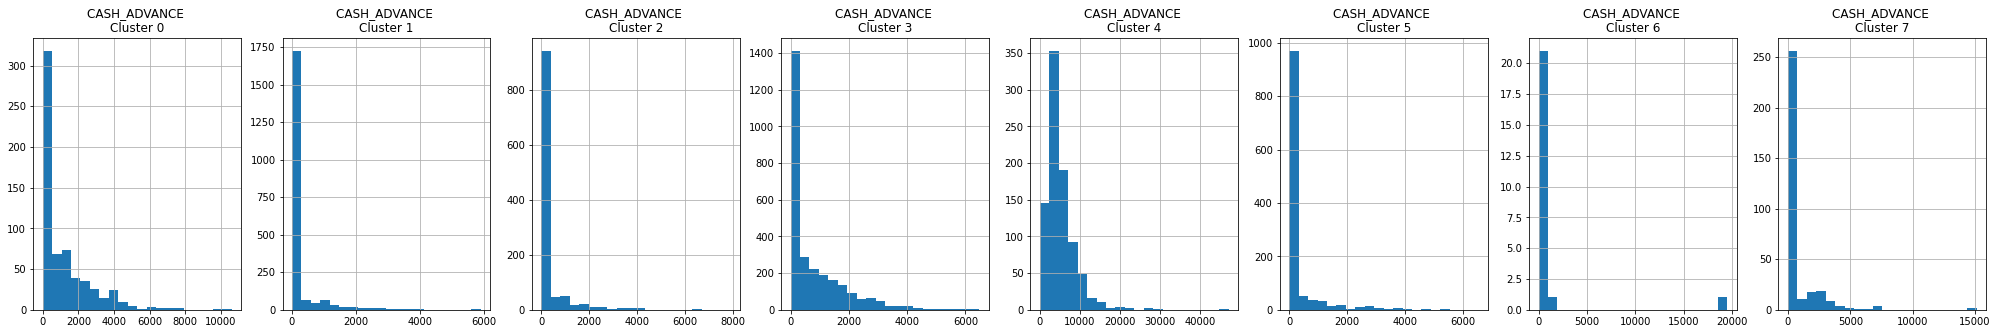

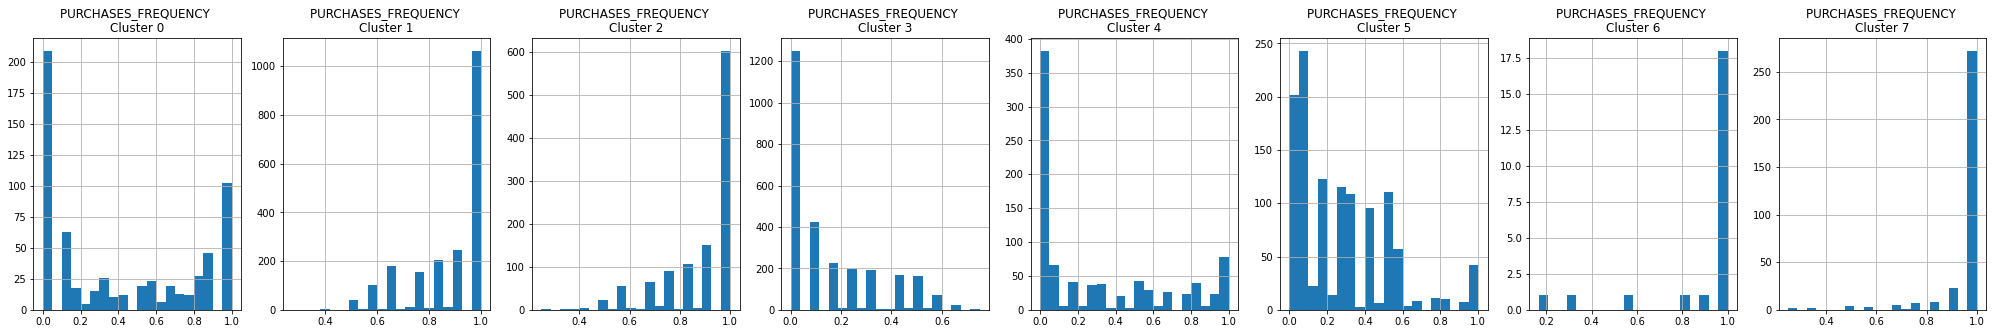

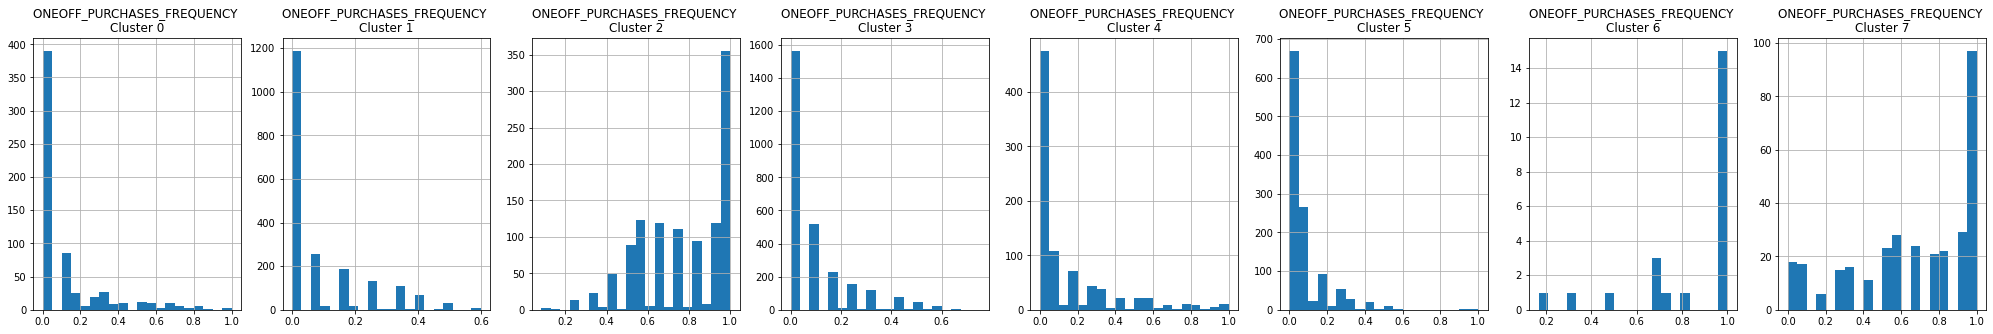

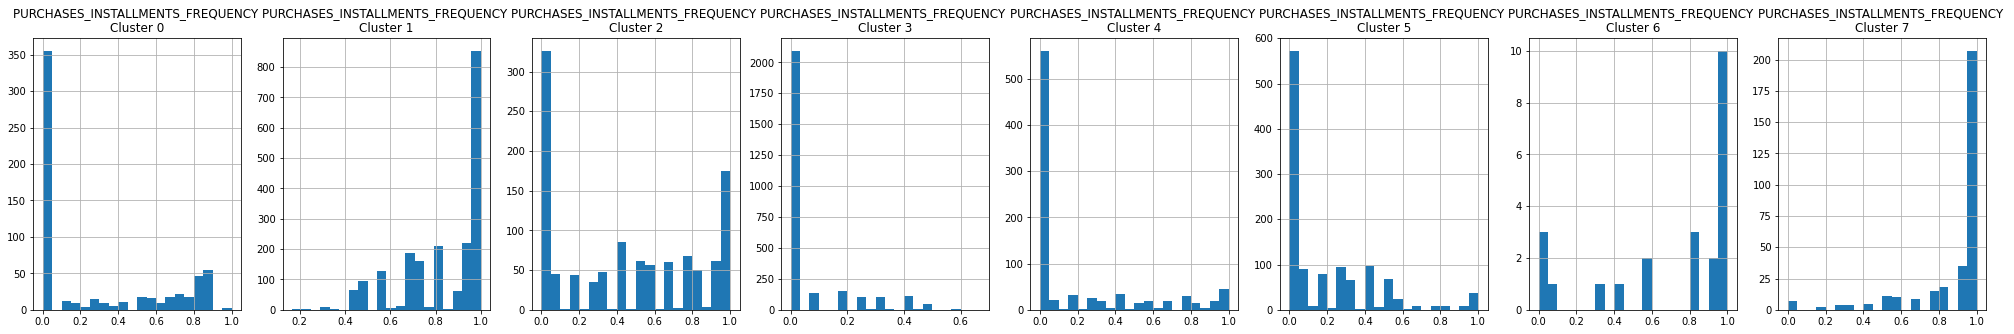

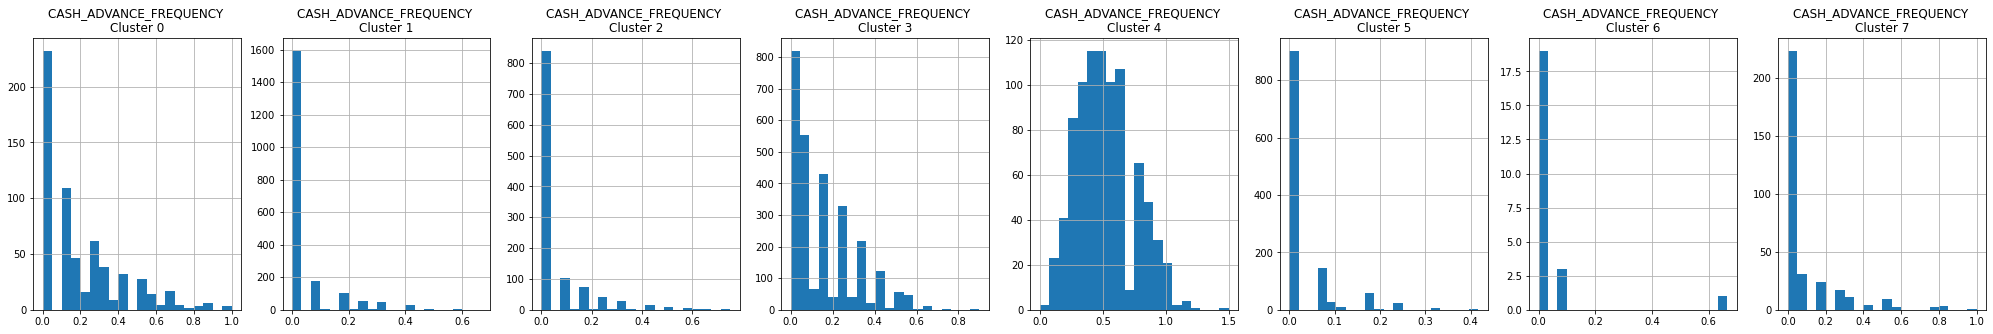

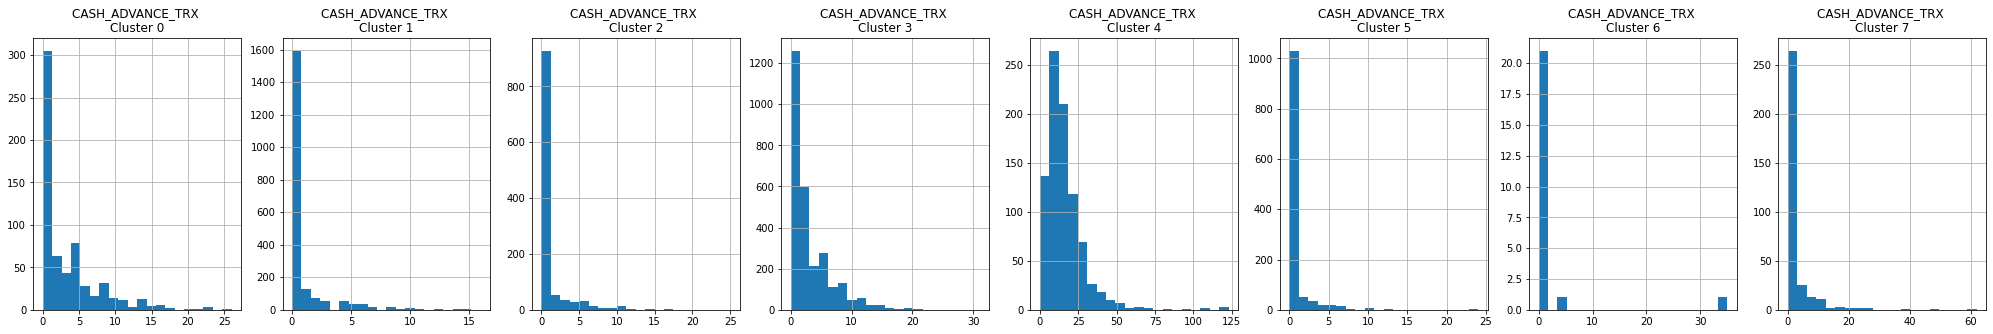

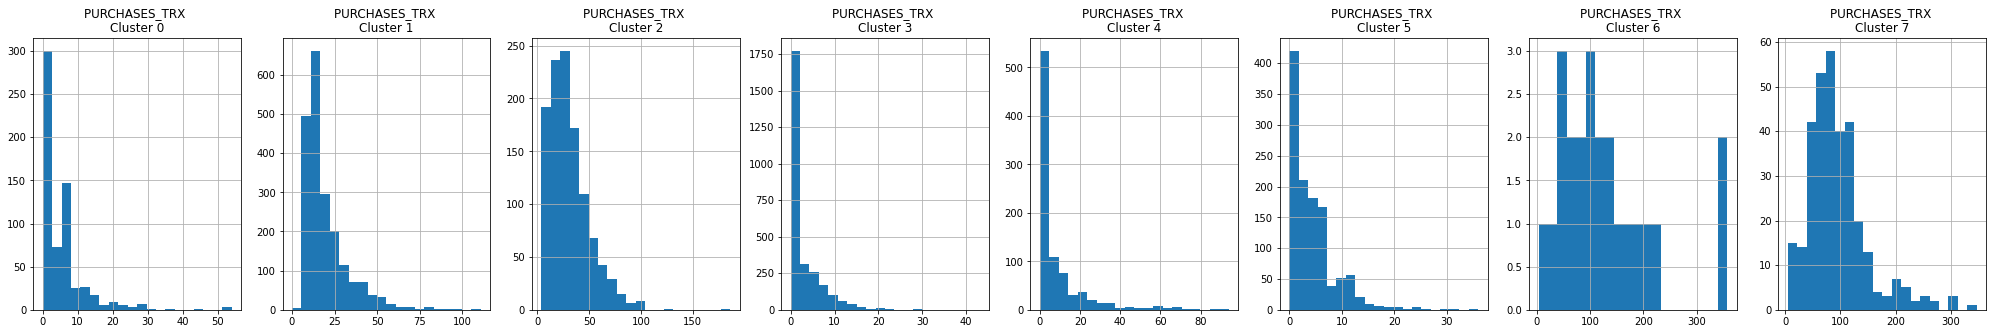

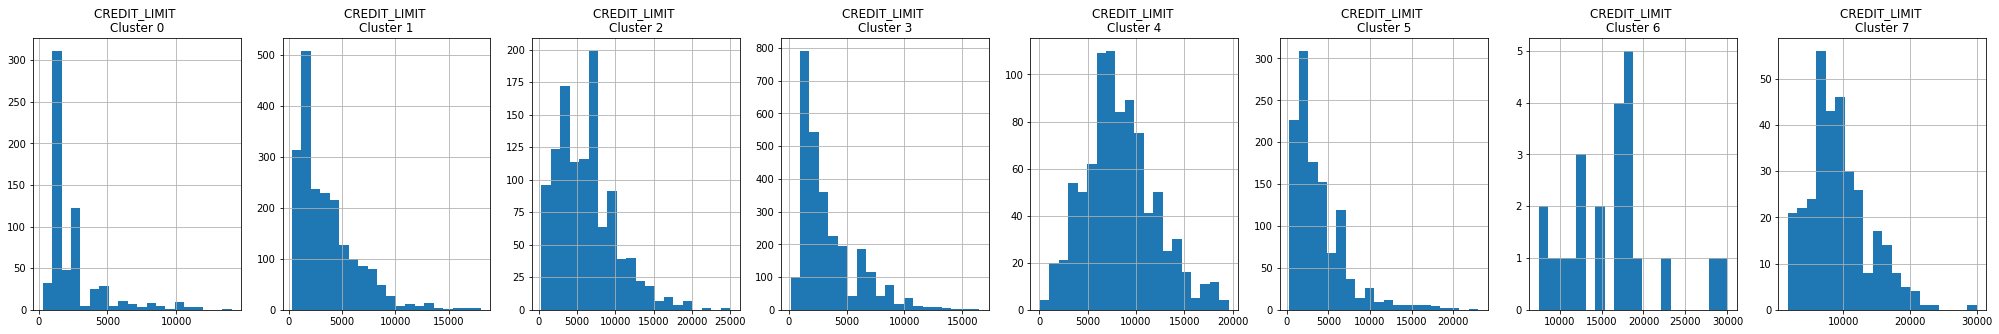

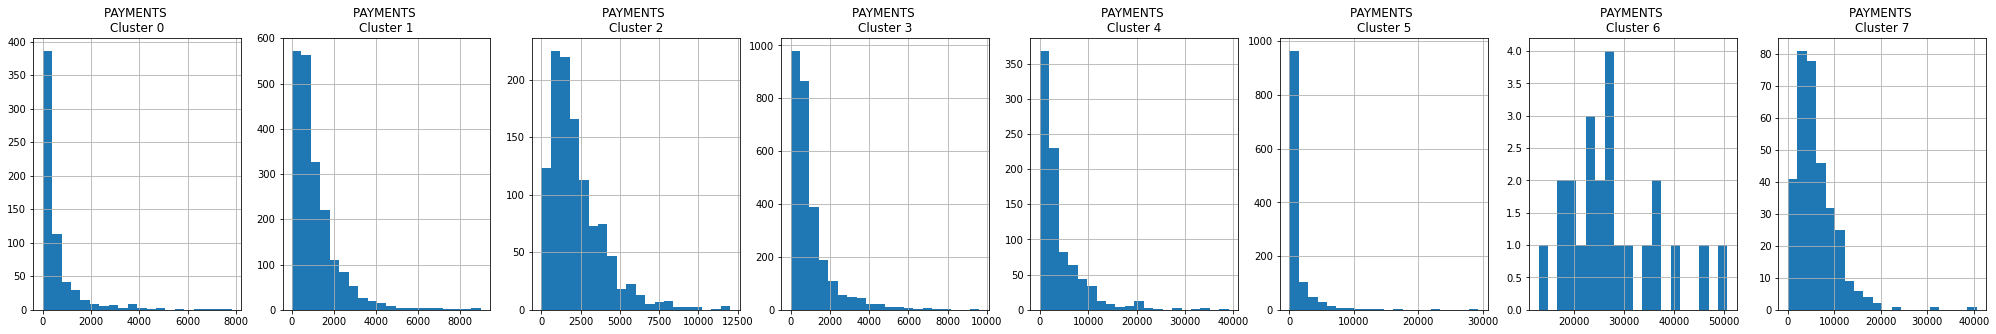

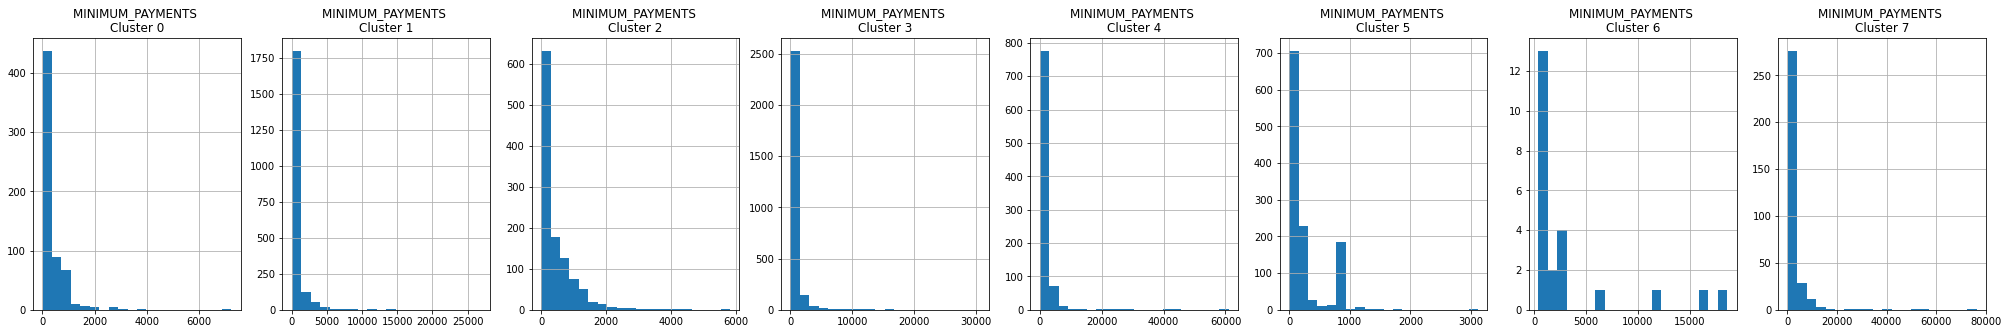

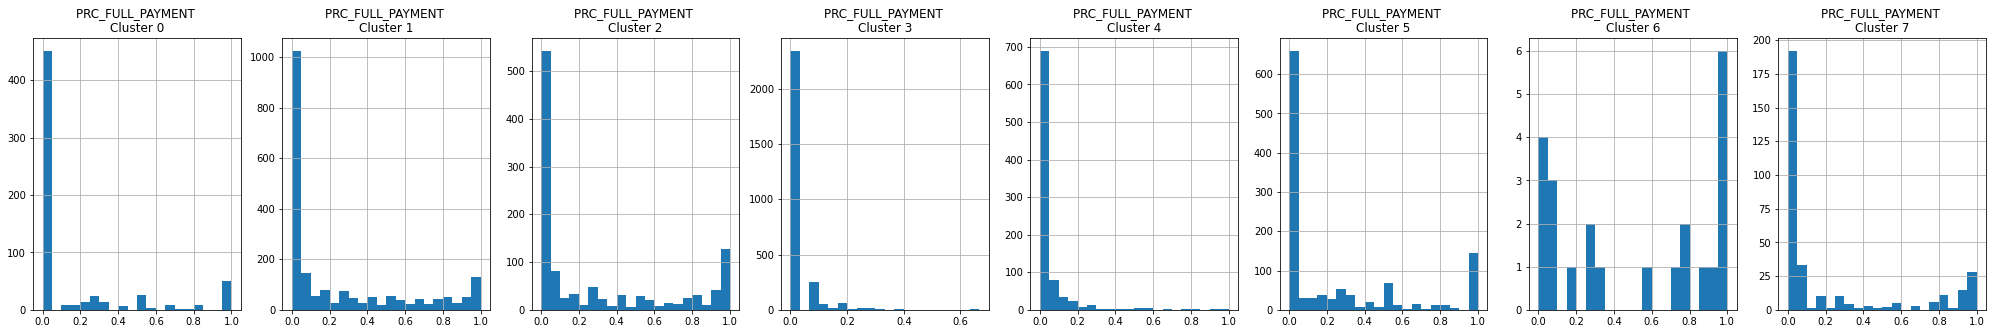

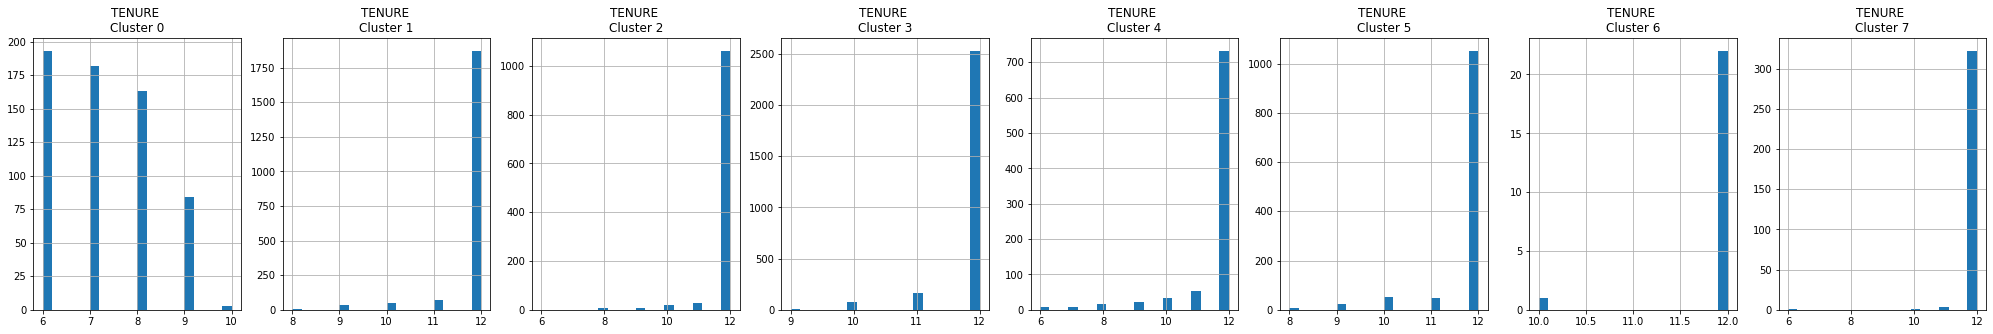

In [33]:
# plot the histogram of various clusters

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i,j))

plt.show()

*** Apply principal component analysis and visualize the results ***

*   PCA is an unsupervised machine learning algorithm
*   PCA performs dimensionality reductions while attempting at keeping the original information unchanged.
*   PCA works by trying to find a new set of features called components.
*   Components are composites of the uncorrelated given input features.





In [34]:
# Obtain the principal components

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221866, -1.07644934],
       [-1.13829466,  2.50648091],
       [ 0.96968932, -0.38349824],
       ...,
       [-0.92620177, -1.81078714],
       [-2.33655225, -0.65797343],
       [-0.5564253 , -0.40046635]])

In [35]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076449
1,-1.138295,2.506481
2,0.969689,-0.383498
3,-0.873628,0.043160
4,-1.599431,-0.688577


In [36]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076449,3
1,-1.138295,2.506481,4
2,0.969689,-0.383498,2
3,-0.873628,0.043160,3
4,-1.599431,-0.688577,3


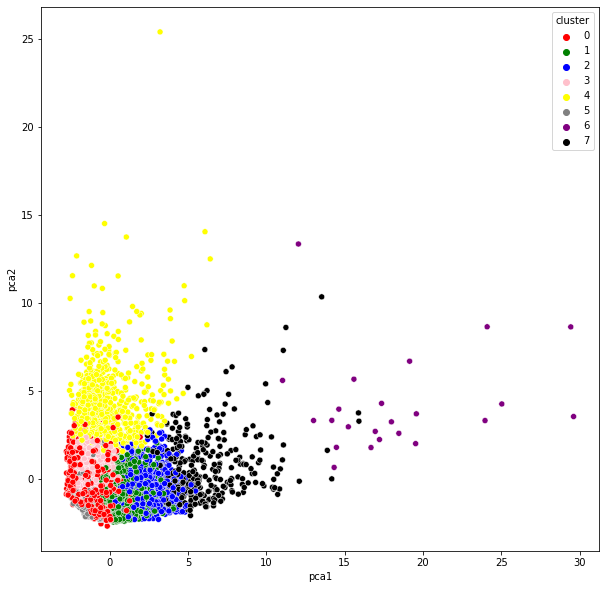

In [37]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])

*** Understand the theory and intuition behind autoencoders ***
(Another Dimentionality reduction technique)


*   Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding(representation learning)
*   Auto encoders use the same input data for the input and output, sounds crazy right!



*** The code Layer ***


*   Auto encoders work by adding a bottleneck in the network.
*   This bottleneck forces the network to create a compressed (encoded) version of the original input.
*   Auto encoders work well if correlations exist between input data ( performs poorly if the all input data is independent)





*** Auto encoder math ***

encoder: h(x) = sigmoid(w*x+b)

decoder: x^ = sigmoid(w*h(x)+c)

here, x= input, w= weight, b=c=bius signal

tied weight:
weights(w) from input to hidden layer will be equal to the weights(w) from hidden layer to output. 

In [38]:
# Apply autoencoders ( perfrom dimentionality reduction using auto encoders)

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [39]:
input_df = Input(shape=(17,))

x=Dense(7,activation='relu')(input_df)
x=Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x=Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x=Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = x=Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = x=Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = x=Dense(17, kernel_initializer='glorot_uniform')(x)

#Auto encoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
creditcard_df_scaled.shape

(8950, 17)

In [41]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 7s 58ms/step - loss: 0.5576
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.3555
Epoch 3/25
70/70 [==============================] - 4s 58ms/step - loss: 0.3053
Epoch 4/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2599
Epoch 5/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2481
Epoch 6/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2180
Epoch 7/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2097
Epoch 8/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2067
Epoch 9/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1886
Epoch 10/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1794
Epoch 11/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1822
Epoch 12/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1756
Epoch 13/25
70/70 [==================

In [42]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [43]:
pred = encoder.predict(creditcard_df_scaled)
pred

280/280 [==============================] - 2s 6ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.0344068 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.3891946 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.8269985 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06076145],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.32529503],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23728594]], dtype=float32)

In [44]:
pred.shape

(8950, 10)

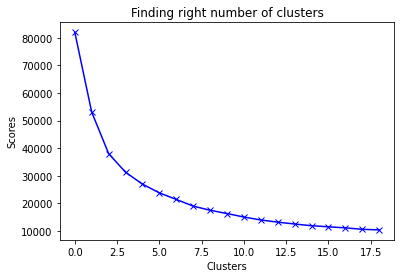

In [45]:
# optimal number of clusters
# kmeans
# PCA

score_2 =[]
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  score_2.append(kmeans.inertia_)

plt.plot(score_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

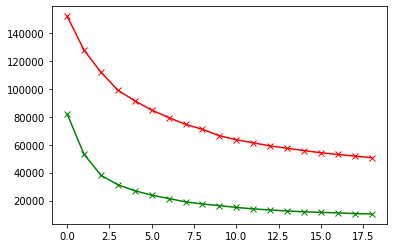

In [48]:
plt.plot(score_1, 'bx-', color='r')
plt.plot(score_2, 'bx-', color='g')

In [49]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [50]:
# concatenate the clusters labels to our original dataframe
creditcard_df_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [51]:
# apply PCA

pca = PCA(n_components= 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp, columns = ['pca1', 'pca2'])


In [52]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.398265,-0.049784,2
1,-0.791053,1.105350,2
2,1.299160,0.481316,0
3,-1.497004,0.033877,2
4,-1.364531,0.180774,2


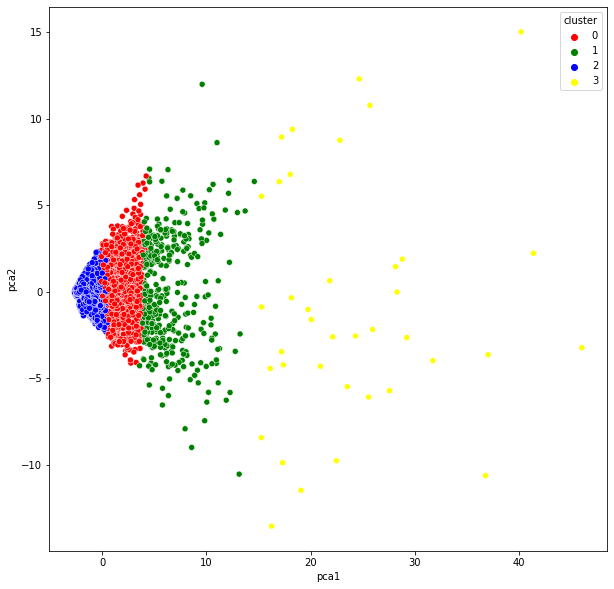

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data = pca_df, palette=['red','green','blue','yellow'])